Mean Squared Error: 0.04
R² Score: 0.95


/tmp/ipython-input-678362727.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


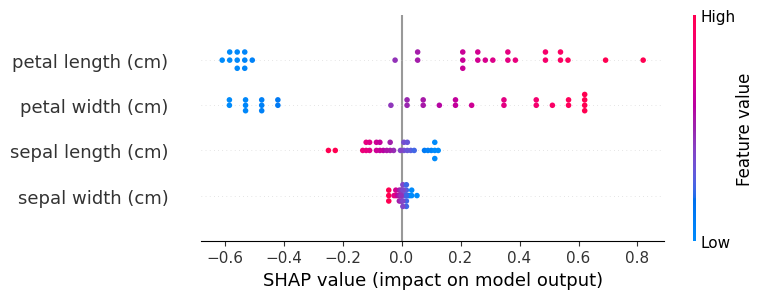

In [9]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target, name = 'target')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

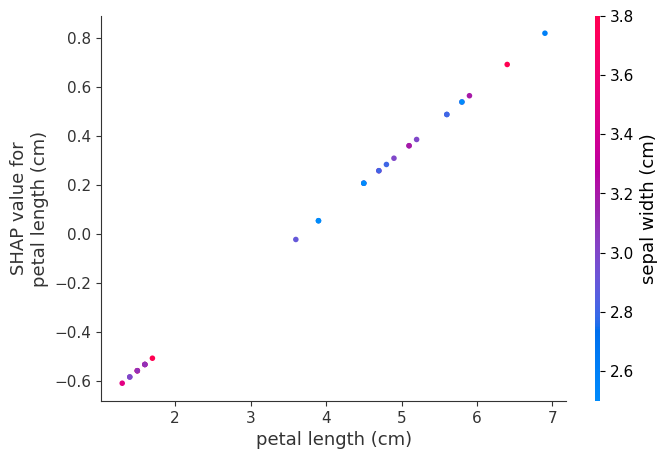

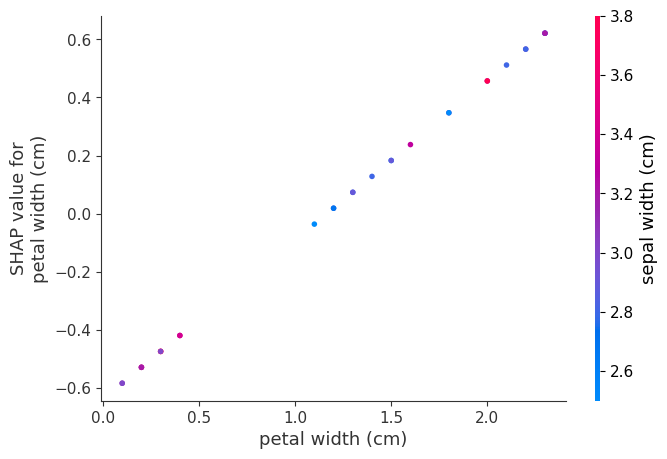

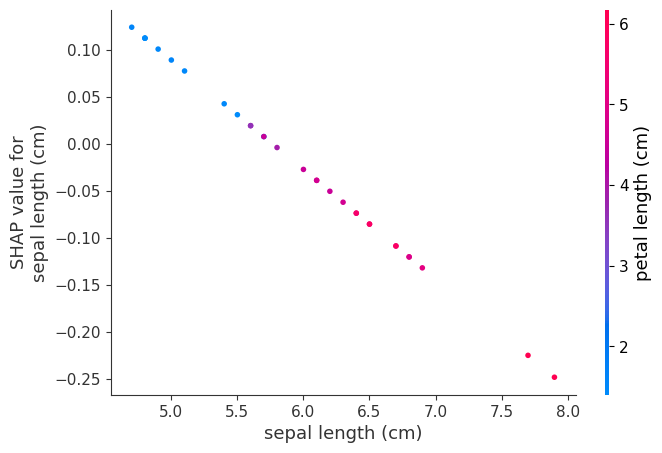

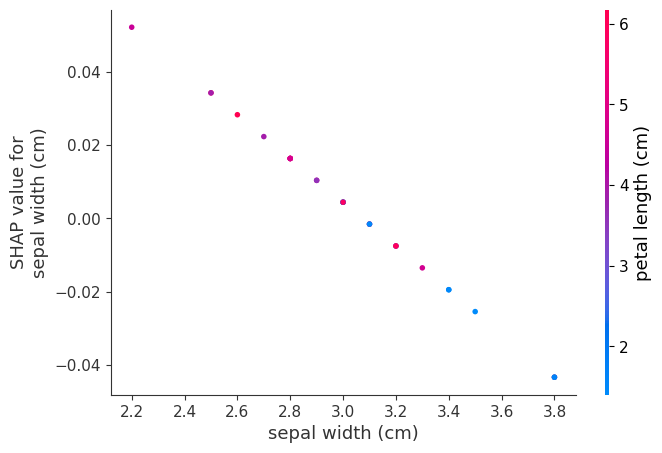

In [10]:

# Generate SHAP dependence plots
selected_features = ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()


# Reflection
For this week, I learned how to build a linear regression model and how to use SHAP to see how each feature had an impact on the outcome prediction.

I loaded the iris dataset and created a dataframe and series from the dataset using pandas. Next, I split the data into training and test sets with a test size of 20%. After that, I initialised the linear regression model and trained it with the training data. Next I produced an outcome prediction based off of the training data and evaluated the cost function. The values of the mean squared error (0.04) and the r2 score (0.95) demonstrate a highly accuracte prediction model.

Using SHAP, I produced a summary plot graph to show how the model's predictions were positively or negatively affected by each feature's values. The petal length and width values produced a negative SHAP value when their respective values were low, but a positive SHAP value when their respectitve values were high. The sepal length and width had the opposite effect: higher values for negative SHAP values and lower values for positive SHAP values. Lastly, I produced a series of dependence plot graphs to show how each feature relates to its SHAP value. The graphs show that the petal length and width have a positive correlation whereas the sepal length and width have a negative correlation.